# Designing your own sentiment analysis tool

While there are a lot of tools that will automatically give us a sentiment of a piece of text, we learned that they don't always agree! Let's design our own to see both how these tools work internally, along with how we can test them to see how well they might perform.

**I've cleaned the dataset up a bit.**

<p class="reading-options">
  <a class="btn" href="/investigating-sentiment-analysis/designing-your-own-sentiment-analysis-tool">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/investigating-sentiment-analysis/notebooks/Designing your own sentiment analysis tool.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/investigating-sentiment-analysis/notebooks/Designing your own sentiment analysis tool.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

### Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.
* **sentiment140-subset.csv:** cleaned subset of Sentiment140 data - half a million tweets marked as positive or negative


In [ ]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/sentiment140-subset.csv.zip -P data
!unzip -n -d data data/sentiment140-subset.csv.zip

--2021-06-18 14:22:22--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/sentiment140-subset.csv.zip
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17927149 (17M) [application/zip]
Saving to: ‘data/sentiment140-subset.csv.zip’

sentiment140-subset 100%[===================>]  17.10M  --.-KB/s    in 0.1s    

2021-06-18 14:22:22 (136 MB/s) - ‘data/sentiment140-subset.csv.zip’ saved [17927149/17927149]

Archive:  data/sentiment140-subset.csv.zip
  inflating: data/sentiment140-subset.csv  


In [ ]:
# !pip install sklearn

## Training on tweets

Let's say we were going to analyze the sentiment of tweets. If we had a list of tweets that were scored positive vs. negative, we could see which words are usually associated with positive scores and which are usually associated with negative scores.

Luckily, we have **Sentiment140** - http://help.sentiment140.com/for-students - a list of 1.6 million tweets along with a score as to whether they're negative or positive. We'll use it to build our own machine learning algorithm to see separate positivity from negativity.

### Read in our data

In [ ]:
import pandas as pd

df = pd.read_csv("data/sentiment140-subset.csv", nrows=30000)
df.head()

,polarity,text
0,0,@kconsidder You never tweet
1,0,Sick today coding from the couch.
2,1,"@ChargerJenn Thx for answering so quick,I was ..."
3,1,Wii fit says I've lost 10 pounds since last ti...
4,0,@MrKinetik Not a thing!!! I don't really have...


It isn't a very complicated dataset. `polarity` is whether it's positive or not, `text` is the text of the tweet itself.

How many rows do we have?

In [ ]:
df.shape

(30000, 2)

How many **positive** tweets compared to how many **negative** tweets?

In [ ]:
df.polarity.value_counts()

1    15064
0    14936
Name: polarity, dtype: int64

## Train our algorithm


### Vectorize our tweets

Create a `TfidfVectorizer` and use it to vectorize our tweets. Since we don't have all the time in the world, we should probably use `max_features` to only take a selection of terms - how about 1000 for now?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(df.text)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

,10,100,11,12,15,1st,20,2day,2nd,30,able,about,account,actually,add,after,afternoon,again,ago,agree,ah,ahh,ahhh,air,album,all,almost,alone,already,alright,also,although,always,am,amazing,amp,an,and,annoying,another,...,work,worked,working,works,world,worried,worry,worse,worst,worth,would,wouldn,wow,write,writing,wrong,wtf,www,xd,xoxo,xx,xxx,ya,yay,yea,yeah,year,years,yep,yes,yesterday,yet,yo,you,young,your,yourself,youtube,yum,yup
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334095,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.427465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### Setting up our variables

Because we want to fit in with all the other progammers, we need to create two variables: one called `X` and one called `y`.

`X` is all of our **features**, the things we use to predict positive or negative. That's going to be our words.

`y` is all of our **labels**, the positive or negative rating. We'll use the `polarity` column for that.

In [ ]:
X = words_df
y = df.polarity

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = clf = MLPClassifier(hidden_layer_sizes=(30,18))
clf.fit(X, y)



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 18), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print("Precisión %", clf.score(X,y))
#print("Coeff", clf.coefs_)
print("Función de perdida", clf.loss_)

Precisión % 0.9861333333333333
Función de perdida 0.030653954341330007


In [ ]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [ ]:
digits = datasets.load_digits()

In [ ]:
print(digits.images)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

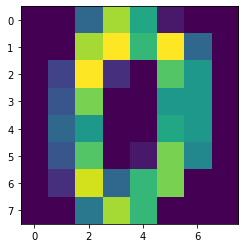

In [ ]:
plt.imshow(digits.images[0])

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf = clf = MLPClassifier(hidden_layer_sizes=(30,18))
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)


In [ ]:
print("Precisión %", clf.score(X_test,y_test))
#print("Coeff", clf.coefs_)
print("Función de perdida", clf.loss_)

Precisión % 0.8954393770856507
Función de perdida 0.006410853487141314


Predicción  [8]  Esperado  8
Predicción  [0]  Esperado  8
Predicción  [4]  Esperado  4
Predicción  [9]  Esperado  9
Predicción  [0]  Esperado  0
Predicción  [8]  Esperado  8
Predicción  [9]  Esperado  9
Predicción  [8]  Esperado  8


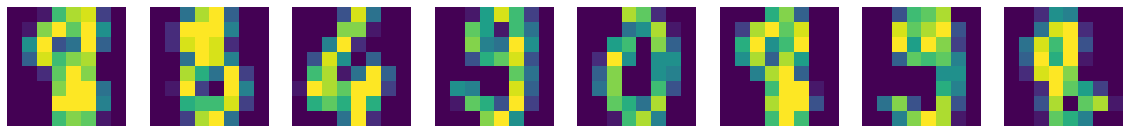

In [ ]:
fig,axes = plt.subplots(nrows=1, ncols=8, figsize=(20, 6))
for i in range(0,8):
  imagen = X_test[i]
  axes[i].set_axis_off()
  axes[i].imshow(imagen.reshape(8, 8))
  print("Predicción ",clf.predict([imagen])," Esperado ",y_test[i])